# Introduction

*What is Classification?*

In statistics, classification is the problem of identifying which of a set of categories an observation, belongs to.
A Classification algorithm is a type Supervised Machine Learning algorithm which predicts data or the category to which the data belongs, based on the training set provided, which contains various features. 

It can be used to:
* Classify different images as cat or dog, based on different features
* Predict if a person is Covid positive or negative, based on different symptoms and tests conducted
* If a person will pass or fail in exams, based on the hours of study and the marks in practice tests
And so on...

Different types of Classificatio algorithm are:
* K-Nearest Neighbors (K-NN)
* Support Vector Machine (SVM)
* Kernel SVM
* Naive Bayes
* Logistic Regression

*About the problem...*

This problem involves classification and prediction of glass type among the 7 different types given,  
1. buildingwindowsfloatprocessed 
2. buildingwindowsnonfloatprocessed
3. vehiclewindowsfloatprocessed 
4. vehiclewindowsnonfloatprocessed (none in this database)
5. containers
6. tableware
7. headlamps. 

This is a Glass Identification Data Set from UCI. It contains 10 attributes including id.

To check which algorithm is based suited to analyse the given dataset, all the different classification models are applied on the dataset and the one with best r2 score or accuracy score is selected as the best algorithm for the given dataset!

Link to dataset: https://www.kaggle.com/uciml/glass

# Preparing the dataset to apply the model

## Importing the libraries

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [73]:
dataset = pd.read_csv('glass_classification_and_analysis_dataset.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Data Preprocessing

### Missing Values

In [74]:
np.any(np.isnan(dataset))

False

In [75]:
dataset.isnull().mean()

RI      0.0
Na      0.0
Mg      0.0
Al      0.0
Si      0.0
K       0.0
Ca      0.0
Ba      0.0
Fe      0.0
Type    0.0
dtype: float64

The dataset is free of any NaN or null values

## Splitting the dataset into the Training set and Test set

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [77]:
print(X_train)

[[ 1.51674 12.79     3.52    ...  7.9      0.       0.     ]
 [ 1.51808 13.43     2.87    ...  9.03     0.       0.     ]
 [ 1.52152 13.05     3.65    ...  9.85     0.       0.17   ]
 ...
 [ 1.51708 13.72     3.68    ...  7.88     0.       0.     ]
 [ 1.52667 13.99     3.7     ...  9.82     0.       0.1    ]
 [ 1.51321 13.       0.      ...  6.93     0.       0.     ]]


In [78]:
print(y_train)

[2 1 1 1 1 3 3 1 1 2 1 2 3 1 1 1 1 2 2 1 3 2 1 7 1 2 6 3 2 7 3 2 2 1 1 2 7
 1 1 3 7 7 2 1 1 1 2 7 1 1 2 2 7 7 7 3 2 1 2 2 5 7 1 2 1 2 2 2 1 3 1 1 1 1
 2 7 1 2 2 2 5 7 1 1 2 2 7 5 6 6 5 2 6 1 2 2 1 1 1 1 2 5 1 2 2 7 1 1 2 1 7
 2 1 1 2 5 3 1 6 2 7 1 5 2 6 3 1 6 2 2 5 2 2 3 7 2 2 1 5 2 7 5 7 1 7 1 2 2
 2 2 1 1 1 2 7 1 7 2 1 5]


In [79]:
print(X_test)

[[1.51727e+00 1.47000e+01 0.00000e+00 2.34000e+00 7.32800e+01 0.00000e+00
  8.95000e+00 6.60000e-01 0.00000e+00]
 [1.51797e+00 1.27400e+01 3.48000e+00 1.35000e+00 7.29600e+01 6.40000e-01
  8.68000e+00 0.00000e+00 0.00000e+00]
 [1.51640e+00 1.25500e+01 3.48000e+00 1.87000e+00 7.32300e+01 6.30000e-01
  8.08000e+00 0.00000e+00 9.00000e-02]
 [1.51905e+00 1.40000e+01 2.39000e+00 1.56000e+00 7.23700e+01 0.00000e+00
  9.57000e+00 0.00000e+00 0.00000e+00]
 [1.52369e+00 1.34400e+01 0.00000e+00 1.58000e+00 7.22200e+01 3.20000e-01
  1.22400e+01 0.00000e+00 0.00000e+00]
 [1.51590e+00 1.30200e+01 3.58000e+00 1.51000e+00 7.31200e+01 6.90000e-01
  7.96000e+00 0.00000e+00 0.00000e+00]
 [1.51841e+00 1.30200e+01 3.62000e+00 1.06000e+00 7.23400e+01 6.40000e-01
  9.13000e+00 0.00000e+00 1.50000e-01]
 [1.51711e+00 1.28900e+01 3.62000e+00 1.57000e+00 7.29600e+01 6.10000e-01
  8.11000e+00 0.00000e+00 0.00000e+00]
 [1.51596e+00 1.27900e+01 3.61000e+00 1.62000e+00 7.29700e+01 6.40000e-01
  8.07000e+00 0.00000e

In [80]:
print(y_test)

[7 1 2 6 5 2 2 2 1 2 1 2 3 2 2 7 2 1 3 3 5 2 7 7 2 1 7 1 2 2 1 1 2 2 2 3 1
 3 2 7 2 6 2 1 2 2 1 2 1 2 1 2 7 1]


In [81]:
from xgboost import XGBClassifier 
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. It is used for speed and performance!

## Feature Scaling

Scaling is done and is important for classification because the distance of the points from the classes is the main principle behind classification. The data consists of some large difference between the values, hence to normalize the range of the variables, Scaling is done. Standard scaler sets the mean of the data as 0 and the other points in terms of standard deviation.

In [82]:
dataset.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [84]:
print(X_train)

[[-0.57016436 -0.8021311   0.59394972 ... -0.73204433 -0.36042422
  -0.5574741 ]
 [-0.12738242 -0.01596892  0.14178098 ...  0.03745343 -0.36042422
  -0.5574741 ]
 [ 1.00931153 -0.48275272  0.68438347 ...  0.59585004 -0.36042422
   1.35466909]
 ...
 [-0.4578167   0.34026082  0.70525279 ... -0.74566376 -0.36042422
  -0.5574741 ]
 [ 2.7110481   0.67192299  0.71916568 ...  0.57542089 -0.36042422
   0.56731601]
 [-1.73659739 -0.54417164 -1.85471789 ... -1.39258666 -0.36042422
  -0.5574741 ]]


In [85]:
print(X_test)

[[-3.95034190e-01  1.54407167e+00 -1.85471789e+00  1.75197496e+00
   8.54487173e-01 -6.88607851e-01 -1.70242868e-02  1.01064199e+00
  -5.57474100e-01]
 [-1.63730189e-01 -8.63550025e-01  5.66123950e-01 -1.61246920e-01
   4.37862630e-01  1.79249921e-01 -2.00886585e-01 -3.60424223e-01
  -5.57474100e-01]
 [-6.82512019e-01 -1.09694192e+00  5.66123950e-01  8.43677703e-01
   7.89389588e-01  1.65689643e-01 -6.09469468e-01 -3.60424223e-01
   4.54837002e-01]
 [ 1.93138841e-01  6.84206777e-01 -1.92128234e-01  2.44588024e-01
  -3.30288871e-01 -6.88607851e-01  4.05178026e-01 -3.60424223e-01
  -5.57474100e-01]
 [ 1.72635393e+00 -3.68513524e-03 -1.85471789e+00  2.83238971e-01
  -5.25581625e-01 -2.54678965e-01  2.22337186e+00 -3.60424223e-01
  -5.57474100e-01]
 [-8.47729162e-01 -5.19604069e-01  6.35688371e-01  1.47960657e-01
   6.46174901e-01  2.47051309e-01 -6.91186045e-01 -3.60424223e-01
  -5.57474100e-01]
 [-1.83391029e-02 -5.19604069e-01  6.63514139e-01 -7.21685652e-01
  -3.69347422e-01  1.7924992

The data is now ready for various algorithms to be applied on it and predict the results. The classification models are available in sklearn library.

# K-Nearest Neighbors (K-NN)

## Training the K-NN model on the Training set

In [86]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier1.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [87]:
y_pred1 = classifier1.predict(X_test)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[7 7]
 [1 1]
 [2 2]
 [6 6]
 [2 5]
 [2 2]
 [1 2]
 [2 2]
 [2 1]
 [1 2]
 [2 1]
 [1 2]
 [2 3]
 [2 2]
 [2 2]
 [7 7]
 [1 2]
 [2 1]
 [1 3]
 [2 3]
 [5 5]
 [1 2]
 [7 7]
 [7 7]
 [1 2]
 [1 1]
 [7 7]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 2]
 [1 3]
 [1 1]
 [1 3]
 [1 2]
 [7 7]
 [2 2]
 [2 6]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 1]
 [2 2]
 [1 1]
 [5 2]
 [7 7]
 [2 1]]


## Making the Confusion Matrix

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred1)
print(cm)
accuracy_score(y_test, y_pred1)

[[ 9  5  0  0  0  0]
 [ 8 15  0  1  0  0]
 [ 3  2  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  7]]


0.6111111111111112

In [89]:
from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred1)

In [90]:
r1

0.7154457498272287

K-NN model predicts the data with an r2 score of **71.54%**

# Kernel SVM

## Training the Kernel SVM model on the Training set

In [108]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'rbf', random_state = 0)
classifier2.fit(X_train, y_train)

SVC(random_state=0)

## Predicting the Test set results

In [109]:
y_pred2 = classifier2.predict(X_test)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

[[7 7]
 [1 1]
 [2 2]
 [6 6]
 [5 5]
 [2 2]
 [1 2]
 [2 2]
 [2 1]
 [2 2]
 [2 1]
 [2 2]
 [2 3]
 [2 2]
 [2 2]
 [7 7]
 [1 2]
 [2 1]
 [1 3]
 [2 3]
 [5 5]
 [1 2]
 [7 7]
 [7 7]
 [2 2]
 [1 1]
 [7 7]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 2]
 [1 2]
 [2 3]
 [1 1]
 [1 3]
 [1 2]
 [7 7]
 [2 2]
 [2 6]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [7 7]
 [2 1]]


## Making the Confusion Matrix

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)

[[10  4  0  0  0  0]
 [ 6 18  0  0  0  0]
 [ 2  3  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  7]]


0.7037037037037037

In [111]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred2)
print(r2)

0.8274015203870076


Kernel SVM model predicts the data with an r2 score of **82.74%**

Same as the last...

# Naive Bayes

## Training the Naive Bayes model on the Training set

In [112]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(X_train, y_train)

GaussianNB()

## Predicting the Test set results

In [113]:
y_pred3 = classifier3.predict(X_test)
print(np.concatenate((y_pred4.reshape(len(y_pred3),1), y_test.reshape(len(y_test),1)),1))

[[7 7]
 [1 1]
 [2 2]
 [6 6]
 [2 5]
 [1 2]
 [1 2]
 [1 2]
 [2 1]
 [1 2]
 [2 1]
 [1 2]
 [1 3]
 [2 2]
 [1 2]
 [7 7]
 [1 2]
 [2 1]
 [1 3]
 [3 3]
 [2 5]
 [1 2]
 [7 7]
 [7 7]
 [1 2]
 [3 1]
 [7 7]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [6 1]
 [3 2]
 [2 2]
 [1 2]
 [2 3]
 [1 1]
 [3 3]
 [1 2]
 [7 7]
 [5 2]
 [6 6]
 [1 2]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [2 2]
 [1 1]
 [1 2]
 [1 1]
 [2 2]
 [7 7]
 [1 1]]


## Making the Confusion Matrix

In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_test, y_pred3)

[[ 9  3  1  0  1  0]
 [17  5  1  1  0  0]
 [ 2  1  2  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  7]]


0.46296296296296297

In [115]:
from sklearn.metrics import r2_score
r3 = r2_score(y_test,y_pred4)
print(r3)

0.5988251554941257


Naive Bayes model predicts the data with an r2 score of **59.88%**

The predictions of the models till now were ok-great... Let's have a look at Logistic Regression!

# Logistic Regression

*What is Logic Regression?*

Logistic Regression is a type of classification method. It is used to model and predict the probability of a class or an event. 


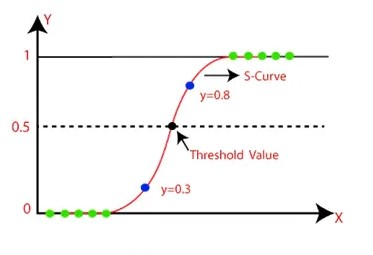

Basically, the probabilty of accurance of an event is plotted. The values of probability above the threshold, (eg:0.8) form a part of the event 1 and the values below the threshold form a part of event or class 0

## Training the Logistic Regression model on the Training set

In [116]:
from sklearn.linear_model import LogisticRegression
classifier4 = LogisticRegression(random_state = 0)
classifier4.fit(X_train,y_train)

LogisticRegression(random_state=0)

The class LogisticRegression() from the sklearn library is applied for training the model

## Predicting the Test set results

In [117]:
y_pred4 = classifier4.predict(X_test)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test.reshape(len(y_test),1)),1))

[[7 7]
 [1 1]
 [2 2]
 [2 6]
 [2 5]
 [2 2]
 [1 2]
 [2 2]
 [2 1]
 [2 2]
 [2 1]
 [1 2]
 [2 3]
 [2 2]
 [2 2]
 [7 7]
 [1 2]
 [1 1]
 [1 3]
 [2 3]
 [5 5]
 [1 2]
 [7 7]
 [7 7]
 [1 2]
 [1 1]
 [7 7]
 [1 1]
 [2 2]
 [1 2]
 [1 1]
 [1 1]
 [2 2]
 [1 2]
 [1 2]
 [1 3]
 [1 1]
 [1 3]
 [1 2]
 [7 7]
 [5 2]
 [6 6]
 [2 2]
 [1 1]
 [1 2]
 [2 2]
 [1 1]
 [2 2]
 [2 1]
 [2 2]
 [1 1]
 [6 2]
 [7 7]
 [1 1]]


## Making the Confusion Matrix

In [118]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred4)
print(cm)
accuracy_score(y_test,y_pred4)

[[11  3  0  0  0  0]
 [10 12  0  1  1  0]
 [ 3  2  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  7]]


0.5925925925925926

In [119]:
from sklearn.metrics import r2_score
r4 = r2_score(y_test,y_pred5)
print(r4)

0.6408085694540429


The Logistic Regression model predicts the data with an r2 score of **64.08%**

# Deterining the final model

In [120]:
r = np.array([r1,r2,r3,r4])
val = np.array(["K-Nearest Neighbors","Kernel SVM","Naive Bayes","Logistic Regression"])
np.concatenate((val.reshape(len(val),1),r.reshape(len(r),1)),1)

array([['K-Nearest Neighbors', '0.7154457498272287'],
       ['Kernel SVM', '0.8274015203870076'],
       ['Naive Bayes', '0.5988251554941257'],
       ['Logistic Regression', '0.6408085694540429']], dtype='<U32')

As we can see above, **Kernel SVM** has the highest r2 score: **0.827** therefore its predictions will be used as final predictions.

# Computing the accuracy with k-fold cross validation

In [121]:
# 10 parts, mean
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier2, X=X_train,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 70.00 %
Standard Deviation: 11.11 %


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  UserWarning,


In [122]:
accuracies

array([0.8125, 0.6875, 0.75  , 0.5   , 0.875 , 0.625 , 0.5625, 0.6875,
       0.6875, 0.8125])

# Final predictions

In [123]:
Predictions = pd.DataFrame({"Actual values" : y_test, "Predicted values" : y_pred2})

In [124]:
Predictions

,Actual values,Predicted values
0,7,7
1,1,1
2,2,2
3,6,6
4,5,5
5,2,2
6,2,1
7,2,2
8,1,2
9,2,2


The confusion matrix...

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred2)
print(cm)

[[10  4  0  0  0  0]
 [ 6 18  0  0  0  0]
 [ 2  3  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  7]]


In [126]:
accuracy_score(y_test, y_pred1)

0.6111111111111112

* The results predicted by the Logistic Regression model have been the most accurate with an r2 score: **0.827**

* Thd accuracy score is quite great: 61.11%


Thus the best model that could be used to predict the type of glass on the features similar to the given features, is the **Kernel SVM**